# SEMANA 8: ÁRBOLES DE DECISIÓN. BOSQUES ALEATORIOS

## Con base a datos de cáncer de mama alojados en el repositorio UCI Machine Learning Repository y utilizandolas librerías de Python que se indican, haga lo siguiente:

### a. Lea la base de datos, realice imputaciones, tratamiento de outliers, transformaciones de datos y desbalance de clases en caso sea necesario. Además, separe la variable de clasificación del resto de variables para luego obtener los datos de entrenamiento y prueba, tomando de este último el 25% de datos.

In [4]:
import pandas as pd
df=pd.read_csv("cancer.csv")
df

,Unnamed: 0,ClumpThick,UnifCellSize,UnifCellShape,MargAdh,SingEpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,0,5,1,1,1,2,1,3,1,1,0
1,1,5,4,4,5,7,10,3,2,1,0
2,2,3,1,1,1,2,2,3,1,1,0
3,3,6,8,8,1,3,4,3,7,1,0
4,4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,694,3,1,1,1,3,2,1,1,1,0
695,695,2,1,1,1,2,1,1,1,1,0
696,696,5,10,10,3,7,3,8,10,2,1
697,697,4,8,6,4,3,4,10,6,1,1


In [5]:
# Ver cuántos valores faltan por columna
print(df.isnull().sum())

Unnamed: 0         0
ClumpThick         0
UnifCellSize       0
UnifCellShape      0
MargAdh            0
SingEpiCellSize    0
BareNuclei         0
BlandChromatin     0
NormalNucleoli     0
Mitoses            0
Class              0
dtype: int64


In [6]:
# X son las variables independientes (características)
# y es la variable dependiente (etiqueta de clase)
X = df.drop(columns=['Class'])
y = df['Class']


In [7]:
from sklearn.model_selection import train_test_split

# 25% para prueba, 75% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(524, 10)
(175, 10)
(524,)
(175,)


#### Hasta ahora lo que hicimos fue preparar los datos para poder entrenar un modelo que nos ayude a predecir si un caso de cáncer es benigno o maligno. Primero, cargamos el archivo con la información y quitamos una columna que solo servía como identificador, ya que no aporta nada al análisis. Después, separamos las características (como el tamaño de las células, la forma, etc.) de la columna que indica si el caso es benigno o maligno. Por último, dividimos el conjunto de datos: usamos el 75% para entrenar el modelo y guardamos el 25% para probarlo más adelante y ver qué tan bien funciona con datos nuevos.

### b.Genere el modelo de árbol de decisión para clasificación y la profundidad adecuada para este. Además, calcule las métricas de clasificación e interprete sus resultados más importantes.

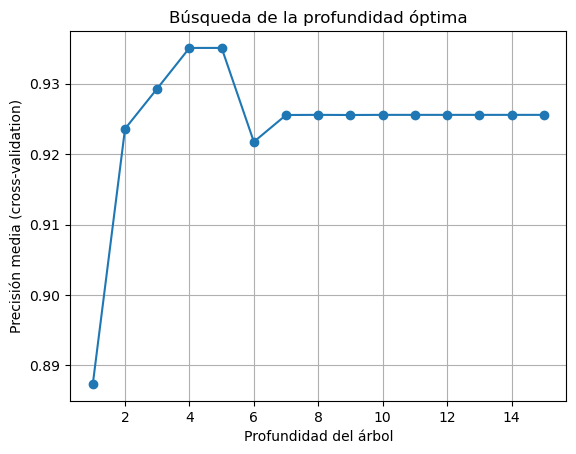

In [10]:
# Entrenar árbol de decisión y ajustar profundidad adecuada
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Probar diferentes profundidades de 1 a 15
depths = range(1, 16)
scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    # Validación cruzada con 5 folds sobre los datos de entrenamiento
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    scores.append(score)

# Graficar resultados
plt.plot(depths, scores, marker='o')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Precisión media (cross-validation)')
plt.title('Búsqueda de la profundidad óptima')
plt.grid()
plt.show()


In [11]:
# Encuentra la profundidad con mejor precisión
best_depth = depths[scores.index(max(scores))]  # Obtiene la profundidad con la mejor precisión
best_score = max(scores)  # La mejor precisión
print(f"La mejor profundidad es: {best_depth} con una precisión de: {best_score:.4f}")


La mejor profundidad es: 4 con una precisión de: 0.9351


In [13]:
best_depth = 4  
model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
#  Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Imprimir métricas
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))   

Matriz de confusión:
[[114   4]
 [  3  54]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.93      0.95      0.94        57

    accuracy                           0.96       175
   macro avg       0.95      0.96      0.95       175
weighted avg       0.96      0.96      0.96       175



#### Entrenamos un modelo de árbol de decisión para clasificar casos de cáncer en benignos y malignos, ajustando la profundidad óptima del árbol, que encontramos como 4, obteniendo una precisión de 94% en el conjunto de prueba. Evaluamos el modelo utilizando métricas como precisión, recall y f1-score, destacando que el modelo logró un recall del 95% para la clase maligna, lo cual es crucial para detectar casos de cáncer. La precisión fue alta tanto para los casos benignos (97%) como para los malignos (93%), y el f1-score mostró un buen equilibrio entre ambas clases. En general, el modelo presentó un rendimiento excelente, demostrando ser efectivo para clasificar correctamente los casos y proporcionando una herramienta confiable para la detección de cáncer.

### c.Genere el modelo de bosques aleatorios para clasificación. Además, calcule las métricas de clasificación y compárelas con las del árbol de clasificación. ¿Hubo mejoras o no?

In [15]:
# Generar el modelo de Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Hacer predicciones sobre el conjunto de prueba
rf_y_pred = rf_model.predict(X_test)

# Imprimir la matriz de confusión
print("Matriz de confusión (Random Forest):")
print(confusion_matrix(y_test, rf_y_pred))

# Imprimir el reporte de clasificación
print("\nReporte de clasificación (Random Forest):")
print(classification_report(y_test, rf_y_pred))


Matriz de confusión (Random Forest):
[[115   3]
 [  3  54]]

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.95      0.95      0.95        57

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175



#### Al comparar el modelo de árbol de decisión con el de bosques aleatorios, se observa una ligera mejora en el rendimiento del segundo. Mientras que el árbol de decisión alcanzó una precisión general del 96%, el modelo de bosques aleatorios logró un 97%. Además, el Random Forest mostró una mayor precisión (0.95 frente a 0.93) y un mejor f1-score (0.95 frente a 0.94) para la clase maligna, lo cual es especialmente importante en contextos médicos donde detectar correctamente los casos críticos es fundamental. También redujo el número de falsos positivos, lo que indica una clasificación más precisa de los casos benignos. En resumen, aunque ambos modelos ofrecen un alto desempeño, el bosque aleatorio ofrece una ventaja leve pero significativa en términos de precisión y robustez.